## Import & Load Data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/MIE368_Project/Data'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
listings_raw = pd.read_csv("{}/O_listings.csv".format(data_dir))
houseprice_raw = pd.read_csv("{}/properties.csv".format(data_dir))
distance_to_downtown = pd.read_csv("{}/distance_to_dt.csv".format(data_dir), header=None)
num_airbnb_nearby = pd.read_csv("{}/num_airbnb_nearby.csv".format(data_dir), header=None)
tone = pd.read_csv("{}/final_tone.csv".format(data_dir), header=None)
avg = pd.read_csv("{}/aveprice.csv".format(data_dir), header=None)
listings_raw = listings_raw.drop(columns=['room_type','id','listing_url','scrape_id','last_scraped','summary','space','experiences_offered','neighborhood_overview','notes','access','interaction','thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_since','host_response_rate','host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_has_profile_pic','host_identity_verified','street','neighbourhood','neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','country_code','country','is_location_exact','accommodates','beds','bed_type','square_feet','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews','number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','requires_license','license','jurisdiction_names','is_business_travel_ready','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','host_location','host_verifications','neighbourhood_cleansed'])
X_aftercleaning = pd.read_csv("{}/X_aftercleaning.csv".format(data_dir))
X_afterfeatureeng = pd.read_csv("{}/X_afterfeatureeng.csv".format(data_dir))



df_dropPriceNa = listings_raw.loc[listings_raw['price']!= 'NaN']
y_price = df_dropPriceNa.price
for i in range(0,3268):
  y_price[i] = y_price[i].replace('$','')
  y_price[i] = y_price[i].replace(',','')
y_price = y_price.astype(float)
listings_raw.drop(columns='price')
listings_raw['price'] = y_price
listings_raw.price
listings_raw = listings_raw.drop(listings_raw[listings_raw['price'] >= 557].index)
listings_raw.reset_index(drop=True, inplace=True)
X_afterfeatureeng.reset_index(drop=True, inplace=True)

X_afterfeatureeng['price'] = listings_raw.price

In [ ]:
#Check
X_afterfeatureeng.isna().sum()

Unnamed: 0                                    0
price                                         0
Agreeableness                                 0
Analytical                                    0
Anger                                         0
                                             ..
Extrapillowsandblankets_**_extra_people       0
Shampoo_**_Hotwater                           0
Freeparkingonpremises_**_House                0
num_airbnb_nearby_**_Freeparkingonpremises    0
num_airbnb_nearby_**_Airconditioning          0
Length: 97, dtype: int64

In [ ]:
X_new = X_afterfeatureeng.copy()
cols = ['price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly','Kitchen', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown', 'num_airbnb_nearby', 'avgpropertyprice','bus', 'walk', 'bik','train', 'car', 'airport']
X_new = X_new[cols]

## Very First Baseline Model (before data transformation, feature engineering, hyper-parameter tuning, etc.) 

The train score is 0.39683171281593177 and the test score is 0.361588178372673


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new.drop('price',1), X_new['price'], test_size=0.30, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)


The train score is 0.39683171281593177 and the test score is 0.361588178372673
Apartment              -25.446945
House                  -51.830142
Nature                  90.024408
Property_type_others   -30.715843
Vacation               -13.983446
Wild                    31.951968
Longtermstaysallowed    -6.063257
Family/kidfriendly      11.197507
Kitchen                 -6.783558
Airconditioning         17.460783
Wifi                   -30.838772
bathrooms               16.075373
bedrooms                34.827032
instant_bookable        -5.607073
distance_to_downtown     0.039316
num_airbnb_nearby        0.001500
avgpropertyprice         0.000007
bus                     -8.207718
walk                    -3.398252
bik                      5.127979
train                   -2.989880
car                     -3.720037
airport                 -1.447131
Intercept               81.405871
dtype: float64


In [ ]:
X_new.columns

Index(['price', 'Apartment', 'House', 'Nature', 'Property_type_others',
       'Vacation', 'Wild', 'Longtermstaysallowed', 'Family/kidfriendly',
       'Kitchen', 'Airconditioning', 'Wifi', 'bathrooms', 'bedrooms',
       'instant_bookable', 'distance_to_downtown', 'num_airbnb_nearby',
       'avgpropertyprice', 'bus', 'walk', 'bik', 'train', 'car', 'airport'],
      dtype='object')

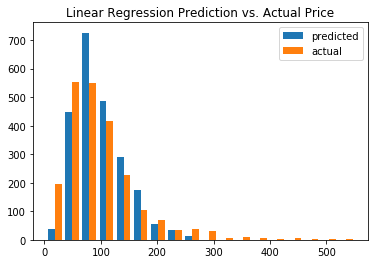

In [ ]:

plt.hist([linreg.predict(X_train), y_train],bins=18,  label=['predicted', 'actual'])
plt.legend(loc='upper right')
plt.title("Linear Regression Prediction vs. Actual Price")
plt.show()

In [ ]:
X_new = X_afterfeatureeng.copy()
cols = ['price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly','Kitchen', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','avgpropertyprice','bus', 'walk', 'bik','train', 'car', 'airport']
X_new = X_new[cols]

X_train, X_test, y_train, y_test = train_test_split(X_new.drop('price',1), X_new['price'], test_size=0.30, random_state=5)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)


The train score is 0.381796278347218 and the test score is 0.3515798963214136
Apartment              -19.101503
House                  -52.683145
Nature                  84.436123
Property_type_others   -30.520129
Vacation               -11.914249
Wild                    29.782902
Longtermstaysallowed    -5.074496
Family/kidfriendly      11.693906
Kitchen                 -4.230528
Airconditioning         16.307897
Wifi                   -25.491171
bathrooms               16.803801
bedrooms                33.920171
instant_bookable        -4.076615
avgpropertyprice         0.000016
bus                     -9.677453
walk                    -0.749301
bik                      5.959844
train                   -4.948126
car                     -5.740217
airport                 -2.170075
Intercept               77.465653
dtype: float64


## Some Improvements: 
Data Transportation, normalization, etc
__sqrt root y__:

In [ ]:
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.sqrt(y_price_new)
X_new1 = X_afterfeatureeng.copy()
X_new1.price = y_price_new
cols = ['price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly','Kitchen', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown', 'num_airbnb_nearby', 'avgpropertyprice','bus', 'walk', 'bik','train', 'car', 'airport']
X_new1 = X_new1[cols]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new1.drop('price',1), X_new1['price'], test_size=0.30, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

In [ ]:
non_binary_columns = ['bathrooms', 'bedrooms','distance_to_downtown', 'num_airbnb_nearby', 'avgpropertyprice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new1.drop('price',1), X_new1['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
X_train_scaled, X_test_scaled, scaler = normalize(X_train, X_test, non_binary_columns)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

train_score = linreg.score(X_train_scaled, y_train)
test_score = linreg.score(X_test_scaled, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train_scaled.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

In [ ]:
from scipy import stats
params = np.append(linreg.intercept_,linreg.coef_)
predictions = linreg.predict(X_test)

newX = pd.DataFrame({"Constant":np.ones(len(X_test))}).join(pd.DataFrame(X_test))
MSE = (sum((y_test-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(y_train,X_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
d = p_values.to_dict()
print(d)

'''i = 0
for i,p in enumerate(p_values):
  if p >= 0.05:
    print(i,p)'''



In [ ]:
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.log(y_price_new)
X_new2 = X_afterfeatureeng.copy()
X_new2.price = y_price_new
cols = ['price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly','Kitchen', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown', 'num_airbnb_nearby', 'avgpropertyprice','bus', 'walk', 'bik','train', 'car', 'airport']
X_new2 = X_new2[cols]
X_new2 = X_new2.drop(X_new2[X_new2['price'] <= 1].index)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new2.drop('price',1), X_new2['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

__normalize__:


In [ ]:
from sklearn.preprocessing import StandardScaler
def normalize(X_train, X_val, non_binary_columns):
   # Define scaling function
    scaler = StandardScaler()
  
    # Scale the X features      
    X_train[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])
    X_val[non_binary_columns] = scaler.transform(X_val[non_binary_columns])
                        
    return X_train, X_val, scaler

In [ ]:
X_new2.columns

In [ ]:
non_binary_columns = ['bathrooms', 'bedrooms','distance_to_downtown', 'num_airbnb_nearby', 'avgpropertyprice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new2.drop('price',1), X_new2['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
X_train_scaled, X_test_scaled, scaler = normalize(X_train, X_test, non_binary_columns)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

train_score = linreg.score(X_train_scaled, y_train)
test_score = linreg.score(X_test_scaled, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train_scaled.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

In [ ]:
X_afterfeatureeng.columns

Basic model + tone + sqrt of y + Drop unnecessary columns in the basic model (kitchen, walk,bik,train,car,airport)

In [ ]:
X_new4 = X_afterfeatureeng.copy()
cols = ['no_alcohol','length_name', 'length_host','minimum_nights_avg_ntm','guests_included','extra_people','host_total_listings_count','Freeparkingonpremises','Heating', 'Hotwater', 'Shampoo','Coffeemaker', 'Microwave','super_strict_30', 'strict_14_with_grace_period',
       'moderate', 'flexible',  'num_airbnb_nearby', 'avgpropertyprice','response_none', 'withinanhour', 'withinafewhours', 'withinaday',
       'afewdaysormore','Agreeableness', 'Analytical', 'Anger',
       'Confident', 'Conscientiousness', 'Disgust', 'Emotional Range',
       'Extraversion', 'Joy', 'Openness', 'Sadness', 'Tentative','price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown','bus']
X_new4 = X_new4[cols]
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.sqrt(y_price_new)
X_new4.price = y_price_new


non_binary_columns = ['length_name', 'length_host', 'minimum_nights_avg_ntm',
       'guests_included', 'extra_people', 'host_total_listings_count',
       'num_airbnb_nearby', 'avgpropertyprice', 
       'bathrooms', 'bedrooms','distance_to_downtown']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new4.drop('price',1), X_new4['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
X_train_scaled, X_test_scaled, scaler = normalize(X_train, X_test, non_binary_columns)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

train_score = linreg.score(X_train_scaled, y_train)
test_score = linreg.score(X_test_scaled, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train_scaled.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

In [ ]:
X_new3 = X_afterfeatureeng.copy()
cols = ['no_alcohol','length_name', 'length_host','minimum_nights_avg_ntm','guests_included','extra_people','host_total_listings_count','Freeparkingonpremises','Heating', 'Hotwater', 'Shampoo','Coffeemaker', 'Microwave','super_strict_30', 'strict_14_with_grace_period',
       'moderate', 'flexible',  'num_airbnb_nearby', 'avgpropertyprice','response_none', 'withinanhour', 'withinafewhours', 'withinaday',
       'afewdaysormore','Agreeableness', 'Analytical', 'Anger',
       'Confident', 'Conscientiousness', 'Disgust', 'Emotional Range',
       'Extraversion', 'Joy', 'Openness', 'Sadness', 'Tentative','price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown','bus']
X_new3 = X_new3[cols]
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.sqrt(y_price_new)
X_new3.price = y_price_new

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new3.drop('price',1), X_new3['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

In [ ]:
def monotone_transform(X):
    X_new = X.copy()
    X_new['SQRTextra_people'] = np.sqrt(X_new['extra_people'])
    X_new['SQRTdistance_to_downtown'] = np.sqrt(X_new['distance_to_downtown'])
    
    return X_new

In [ ]:
X_new4 = X_afterfeatureeng.copy()
cols = ['no_alcohol','length_name', 'length_host','minimum_nights_avg_ntm','guests_included','extra_people','host_total_listings_count','Freeparkingonpremises','Heating', 'Hotwater', 'Shampoo','Coffeemaker', 'Microwave','super_strict_30', 'strict_14_with_grace_period',
       'moderate', 'flexible',  'num_airbnb_nearby', 'avgpropertyprice','response_none', 'withinanhour', 'withinafewhours', 'withinaday',
       'afewdaysormore','Agreeableness', 'Analytical', 'Anger',
       'Confident', 'Conscientiousness', 'Disgust', 'Emotional Range',
       'Extraversion', 'Joy', 'Openness', 'Sadness', 'Tentative','price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown','bus']
X_new4 = X_new4[cols]
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.sqrt(y_price_new)
X_new4.price = y_price_new
X_new4 = monotone_transform(X_new4)
X_new4 = X_new4.drop(columns = "extra_people")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new4.drop('price',1), X_new4['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(y_train,X_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
d = p_values.to_dict()
for i in d.keys():
  if d[i]<=0.05:
    print(i)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
base_corrs = X_new5.corr().price.drop(index='price')

for feature1 in base_corrs.index:
    for feature2 in base_corrs.index:
        if feature2 != feature1:
            # divide the two features to create a new feature
            new_feature = X_train[feature1] - X_train[feature2]
            new_corr = np.abs(np.round(np.corrcoef(new_feature, y_train)[0,1], 3))
            corr1 = np.abs(np.round(base_corrs[feature1], 3))
            corr2 = np.abs(np.round(base_corrs[feature2], 3))
            # add a threshold of 0.05 to make sure that the improvement is meaningful
            if new_corr > max(corr1, corr2)+0.05:
                print('{} {} combine to get correlation {} compared to {} {}'.format(
                    feature1, feature2, np.round(np.corrcoef(new_feature, y_train)[0,1], 3), corr1, corr2))

In [ ]:
def new_feature_combos(X):
   
    # First, we apply the monotone transform function
    X_new = monotone_transform(X)
    X_new = X_new.drop(columns = "extra_people")
    # Then we add new features
    X_new['Freeparkingonpremises_*_distance_to_downtown'] = X_new.Freeparkingonpremises*X_new.distance_to_downtown #has positive correlation with price
    X_new = X_new.drop(columns = ["Freeparkingonpremises",'distance_to_downtown'] )
    return X_new


In [ ]:
X_new5 = X_afterfeatureeng.copy()
cols = ['no_alcohol','length_name', 'length_host','minimum_nights_avg_ntm','guests_included','extra_people','host_total_listings_count','Freeparkingonpremises','Heating', 'Hotwater', 'Shampoo','Coffeemaker', 'Microwave','super_strict_30', 'strict_14_with_grace_period',
       'moderate', 'flexible',  'num_airbnb_nearby', 'avgpropertyprice','response_none', 'withinanhour', 'withinafewhours', 'withinaday',
       'afewdaysormore','Agreeableness', 'Analytical', 'Anger',
       'Confident', 'Conscientiousness', 'Disgust', 'Emotional Range',
       'Extraversion', 'Joy', 'Openness', 'Sadness', 'Tentative','price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown','bus']
X_new5 = X_new5[cols]
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.sqrt(y_price_new)
X_new5.price = y_price_new
X_new5 = new_feature_combos(X_new5)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new5.drop('price',1), X_new5['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

In [ ]:
def new_feature_combos1(X):
   
    # First, we apply the monotone transform function
    X_new = monotone_transform(X)
    
    
    # Then we add new features
    X_new['Freeparkingonpremises_*_distance_to_downtown'] = X_new.Freeparkingonpremises*X_new.distance_to_downtown #has positive correlation with price
    X_new['Apartment+bathrooms'] =  X_new.Apartment + X_new.bathrooms
    X_new['Apartment+bedrooms'] =  X_new.Apartment + X_new.bedrooms

    X_new = X_new.drop(columns = 'extra_people')

    # X_new = X_new.drop(columns = ["Freeparkingonpremises",'distance_to_downtown'] )

    return X_new


In [ ]:
X_new6 = X_afterfeatureeng.copy()
cols = ['no_alcohol','length_name', 'length_host','minimum_nights_avg_ntm','guests_included','extra_people','host_total_listings_count','Freeparkingonpremises','Heating', 'Hotwater', 'Shampoo','Coffeemaker', 'Microwave','super_strict_30', 'strict_14_with_grace_period',
       'moderate', 'flexible',  'num_airbnb_nearby', 'avgpropertyprice','response_none', 'withinanhour', 'withinafewhours', 'withinaday',
       'afewdaysormore','Agreeableness', 'Analytical', 'Anger',
       'Confident', 'Conscientiousness', 'Disgust', 'Emotional Range',
       'Extraversion', 'Joy', 'Openness', 'Sadness', 'Tentative','price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown','bus']
X_new6 = X_new6[cols]
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.sqrt(y_price_new)
X_new6.price = y_price_new
X_new6 = new_feature_combos1(X_new6)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new6.drop('price',1), X_new6['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

In [ ]:
base_corrs = X_new5.corr().price.drop(index='price')
for feature1 in base_corrs.index:
    for feature2 in base_corrs.index:
        if feature2 != feature1:
            # two features to the power to create a new feature
            new_feature = X_train[feature1] ** X_train[feature2]
            new_corr = np.abs(np.round(np.corrcoef(new_feature, y_train)[0,1], 3))
            corr1 = np.abs(np.round(base_corrs[feature1], 3))
            corr2 = np.abs(np.round(base_corrs[feature2], 3))
            # add a threshold of 0.05 to make sure that the improvement is meaningful
            if new_corr > max(corr1, corr2)+0.05:
                print('{} {} combine to get correlation {} compared to {} {}'.format(
                    feature1, feature2, np.round(np.corrcoef(new_feature, y_train)[0,1], 3), corr1, corr2))

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Coffeemaker Hotwater combine to get correlation 0.164 compared to 0.097 0.056
Coffeemaker SQRTextra_people combine to get correlation 0.162 compared to 0.097 0.044
Microwave SQRTextra_people combine to get correlation 0.104 compared to 0.019 0.044
afewdaysormore SQRTextra_people combine to get correlation 0.096 compared to 0.037 0.044
Analytical SQRTextra_people combine to get correlation 0.103 compared to 0.004 0.044
Anger SQRTextra_people combine to get correlation 0.1 compared to 0.019 0.044
Conscientiousness SQRTextra_people combine to get correlation 0.101 compared to 0.012 0.044
Disgust SQRTextra_people combine to get correlation 0.1 compared to 0.002 0.044
Joy SQRTextra_people combine to get correlation 0.109 compared to 0.017 0.044
Openness SQRTextra_people combine to get correlation 0.097 compared to 0.021 0.044
Sadness SQRTextra_people combine to get correlation 0.1 compared to 0.023 0.044
Tentative SQRTextra_people combine to get correlation 0.095 compared to 0.011 0.044
Nat

In [ ]:
def new_feature_combos1(X):
   
  # First, we apply the monotone transform function
  X_new = monotone_transform(X)
    
    
  # Then we add new features
  X_new['Freeparkingonpremises_*_distance_to_downtown'] = X_new.Freeparkingonpremises*X_new.distance_to_downtown #has positive correlation with price
  X_new['Apartment+bathrooms'] =  X_new.Apartment + X_new.bathrooms
  X_new['Apartment+bedrooms'] =  X_new.Apartment + X_new.bedrooms
  X_new['bathrooms**Shampoo'] = X_new.bathrooms ** X_new.Shampoo

  X_new = X_new.drop(columns = 'extra_people')

    # X_new = X_new.drop(columns = ["Freeparkingonpremises",'distance_to_downtown'] )

  return X_new

In [ ]:
X_new7 = X_afterfeatureeng.copy()
cols = ['no_alcohol','length_name', 'length_host','minimum_nights_avg_ntm','guests_included','extra_people','host_total_listings_count','Freeparkingonpremises','Heating', 'Hotwater', 'Shampoo','Coffeemaker', 'Microwave','super_strict_30', 'strict_14_with_grace_period',
       'moderate', 'flexible',  'num_airbnb_nearby', 'avgpropertyprice','response_none', 'withinanhour', 'withinafewhours', 'withinaday',
       'afewdaysormore','Agreeableness', 'Analytical', 'Anger',
       'Confident', 'Conscientiousness', 'Disgust', 'Emotional Range',
       'Extraversion', 'Joy', 'Openness', 'Sadness', 'Tentative','price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown','bus']
X_new7 = X_new7[cols]
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.sqrt(y_price_new)
X_new7.price = y_price_new
X_new7 = new_feature_combos1(X_new7)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new7.drop('price',1), X_new7['price'], test_size=0.30, random_state=5)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import precision_score, recall_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print('The train score is {} and the test score is {}'.format(train_score, test_score))

betas = pd.Series(linreg.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)


The train score is 0.5037681100076767 and the test score is 0.4592038794677354
no_alcohol                                     -1.633637e+00
length_name                                    -6.050393e-02
length_host                                    -3.497904e-03
minimum_nights_avg_ntm                         -6.818441e-03
guests_included                                 2.029261e-01
host_total_listings_count                       6.027972e-03
Freeparkingonpremises                           2.569960e-01
Heating                                        -6.609343e-01
Hotwater                                       -4.478586e-01
Shampoo                                         4.451760e-01
Coffeemaker                                     5.009502e-01
Microwave                                      -5.214012e-01
super_strict_30                                -4.107825e-14
strict_14_with_grace_period                     7.800545e-02
moderate                                        5.661860e-04
flexib

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

mdl = LinearRegression()
optimized_dt = GridSearchCV(mdl, parameters,  cv=None)

optimized_dt.fit(X_train, y_train)
print(optimized_dt.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'copy_X': True, 'fit_intercept': True, 'normalize': False}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

lm = LinearRegression()

#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(lm, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print (scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(lm, X_test, y_test, cv = 2)     #y_test is needed here in predictions to get scores for each fold of cv

#If this is good, continue to fit the model on the data


lm.fit(X_train, y_train)

y_hat = lm.predict(X_test)      #this gives me my predictions

lm.score(X_test, y_test)     #this tells me my model performance

[0.50969705 0.45610793 0.46625766 0.4619752  0.48277764] 0.47536309724113324 0.019322020734055843


0.4592038794677354

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_new7 = X_afterfeatureeng.copy()
cols = ['no_alcohol','length_name', 'length_host','minimum_nights_avg_ntm','guests_included','extra_people','host_total_listings_count','Freeparkingonpremises','Heating', 'Hotwater', 'Shampoo','Coffeemaker', 'Microwave','super_strict_30', 'strict_14_with_grace_period',
       'moderate', 'flexible',  'num_airbnb_nearby', 'avgpropertyprice','response_none', 'withinanhour', 'withinafewhours', 'withinaday',
       'afewdaysormore','Agreeableness', 'Analytical', 'Anger',
       'Confident', 'Conscientiousness', 'Disgust', 'Emotional Range',
       'Extraversion', 'Joy', 'Openness', 'Sadness', 'Tentative','price','Apartment', 'House', 'Nature', 'Property_type_others', 'Vacation','Wild', 'Longtermstaysallowed','Family/kidfriendly', 'Airconditioning', 'Wifi','bathrooms', 'bedrooms','instant_bookable','distance_to_downtown','bus']
X_new7 = X_new7[cols]
y_price_new = X_afterfeatureeng['price'].copy()
y_price_new = np.sqrt(y_price_new)
X_new7.price = y_price_new
X_new7 = new_feature_combos1(X_new7)

#split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new7.drop('price',1), X_new7['price'], test_size=0.30, random_state=5)


regr = RandomForestRegressor(max_depth= 4, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

# calculate the score
train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

# calculate betas
betas = pd.Series(regr.feature_importances_, index=X_train.columns)
# betas = betas.append(pd.Series({"Intercept": regr.intercept_}))
print(betas)


The train score is 0.5543917525486837 and the test score is 0.5020693777273341
no_alcohol                                      0.000000
length_name                                     0.000774
length_host                                     0.007521
minimum_nights_avg_ntm                          0.002590
guests_included                                 0.007271
host_total_listings_count                       0.008162
Freeparkingonpremises                           0.000000
Heating                                         0.001447
Hotwater                                        0.001910
Shampoo                                         0.000476
Coffeemaker                                     0.000065
Microwave                                       0.000383
super_strict_30                                 0.000000
strict_14_with_grace_period                     0.000447
moderate                                        0.000115
flexible                                        0.000331
num_airbn

In [ ]:
X_new7.columns

Index(['no_alcohol', 'length_name', 'length_host', 'minimum_nights_avg_ntm',
       'guests_included', 'host_total_listings_count', 'Freeparkingonpremises',
       'Heating', 'Hotwater', 'Shampoo', 'Coffeemaker', 'Microwave',
       'super_strict_30', 'strict_14_with_grace_period', 'moderate',
       'flexible', 'num_airbnb_nearby', 'avgpropertyprice', 'response_none',
       'withinanhour', 'withinafewhours', 'withinaday', 'afewdaysormore',
       'Agreeableness', 'Analytical', 'Anger', 'Confident',
       'Conscientiousness', 'Disgust', 'Emotional Range', 'Extraversion',
       'Joy', 'Openness', 'Sadness', 'Tentative', 'price', 'Apartment',
       'House', 'Nature', 'Property_type_others', 'Vacation', 'Wild',
       'Longtermstaysallowed', 'Family/kidfriendly', 'Airconditioning', 'Wifi',
       'bathrooms', 'bedrooms', 'instant_bookable', 'distance_to_downtown',
       'bus', 'SQRTextra_people', 'SQRTdistance_to_downtown',
       'Freeparkingonpremises_*_distance_to_downtown', 'Apar

# **Linear Regression Plot**

(array([112., 716., 660., 364., 219., 115.,  45.,  14.,   7.,   8.,   1.,
          1.,   0.,   0.,   2.]),
 array([ 12.86377349,  42.96643167,  73.06908985, 103.17174803,
        133.27440621, 163.37706439, 193.47972257, 223.58238075,
        253.68503893, 283.78769711, 313.89035529, 343.99301347,
        374.09567165, 404.19832983, 434.30098801, 464.40364619]),
 <a list of 15 Patch objects>)

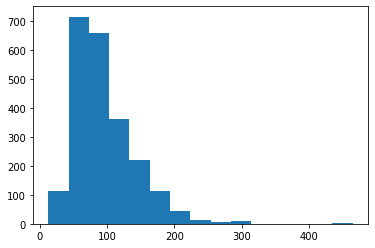

In [ ]:
import matplotlib.pyplot as plt
#y_test graph
plt.hist(linreg.predict(X_train)**2, bins = 15)

(array([591., 614., 480., 256., 125.,  78.,  36.,  41.,   7.,  13.,   8.,
          3.,   5.,   5.,   2.]),
 array([ 16. ,  51.6,  87.2, 122.8, 158.4, 194. , 229.6, 265.2, 300.8,
        336.4, 372. , 407.6, 443.2, 478.8, 514.4, 550. ]),
 <a list of 15 Patch objects>)

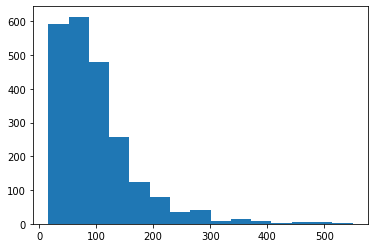

In [ ]:
plt.hist(y_train**2,bins = 15)

# **Random Forest Plot**

(array([677.,  71., 442., 353., 147., 184., 103.,  70.,  88.,  79.,  36.,
          8.,   4.,   1.,   1.]),
 array([ 40.24293501,  56.06271715,  71.88249929,  87.70228144,
        103.52206358, 119.34184573, 135.16162787, 150.98141002,
        166.80119216, 182.62097431, 198.44075645, 214.2605386 ,
        230.08032074, 245.90010289, 261.71988503, 277.53966718]),
 <a list of 15 Patch objects>)

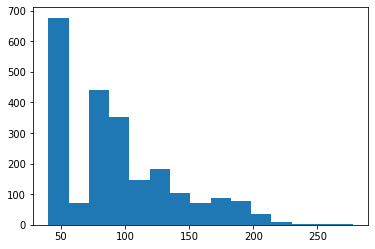

In [ ]:
plt.hist(regr.predict(X_train)**2, bins = 15)

# **CART**

The score of this model over training data is 0.516 and 0.473 over the testing data


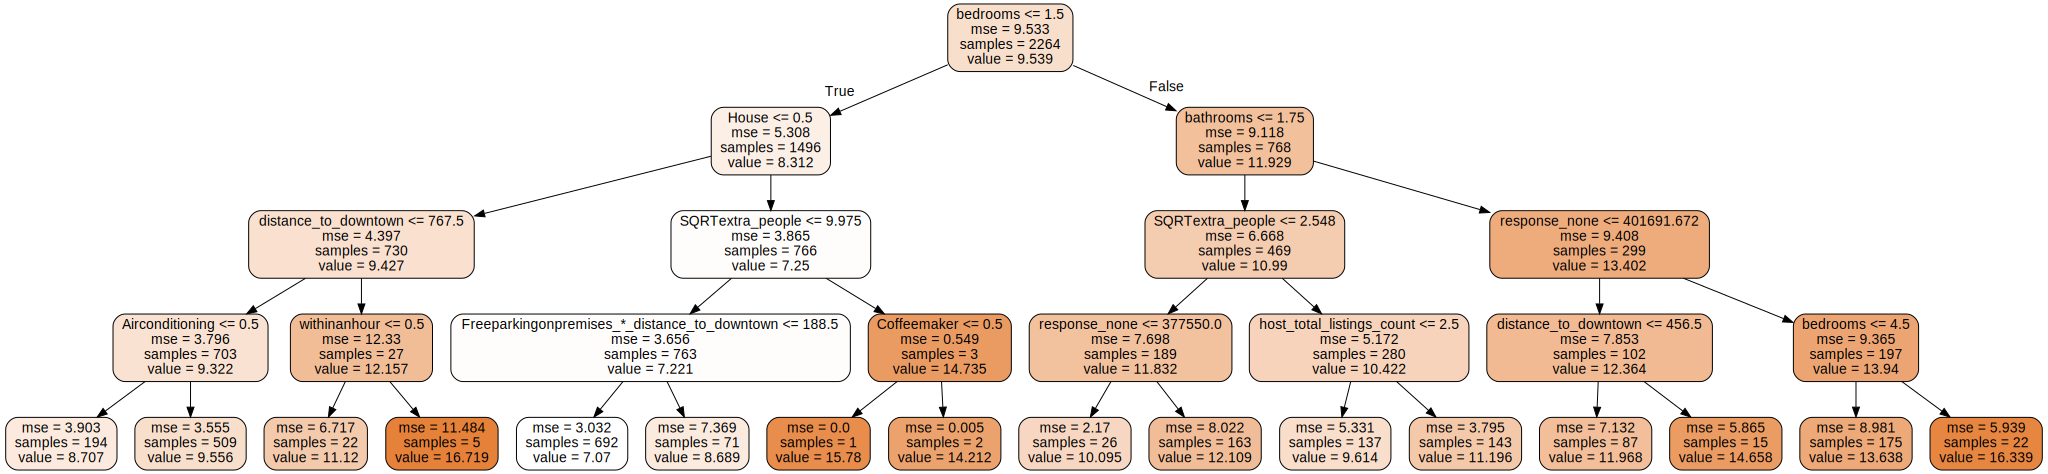

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import SVG
from graphviz import Source

# Train the CART model
cart_model = DecisionTreeRegressor(random_state=1,max_depth=4
                                   )
cart_model.fit(X_train, y_train)
train_score = cart_model.score(X_train, y_train)
test_score = cart_model.score(X_test, y_test)

# Print out summary of model performance 
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

# Visualize the decision tree
cart_graph = Source(export_graphviz(cart_model,
                   feature_names = X_new7.columns[1:],
                   rounded = True, proportion = False, 
                  filled = True))
SVG(cart_graph.pipe(format='svg'))